In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd


df = pd.read_csv('wiki_movie_plots_deduped.csv', header=0)
data = df.copy()
data

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
...,...,...,...,...,...,...,...,...
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...


Load and Inspect Dataset

In [11]:
# Load the Wikipedia Movie Plots dataset
df = pd.read_csv("wiki_movie_plots_deduped.csv")
print(df.head())
print(f"Total movies: {len(df)}")

# Focus on key columns
movies = df[['Title', 'Plot', 'Genre', 'Release Year']].dropna()
plots = movies['Plot'].tolist()
titles = movies['Title'].tolist()

   Release Year                             Title Origin/Ethnicity  \
0          1901            Kansas Saloon Smashers         American   
1          1901     Love by the Light of the Moon         American   
2          1901           The Martyred Presidents         American   
3          1901  Terrible Teddy, the Grizzly King         American   
4          1902            Jack and the Beanstalk         American   

                             Director Cast    Genre  \
0                             Unknown  NaN  unknown   
1                             Unknown  NaN  unknown   
2                             Unknown  NaN  unknown   
3                             Unknown  NaN  unknown   
4  George S. Fleming, Edwin S. Porter  NaN  unknown   

                                           Wiki Page  \
0  https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...   
1  https://en.wikipedia.org/wiki/Love_by_the_Ligh...   
2  https://en.wikipedia.org/wiki/The_Martyred_Pre...   
3  https://en.wikipedia.

Exploratory Data Analysis (EDA)

**Basic Stats: Checks data size, missing values, and summary stats.

***Plot Length Distribution: Histogram shows how long plots are—important for RAG context limits.

**Genre Distribution: Bar plot reveals dominant genres—useful for query relevance.

**Release Year Trends: Histogram tracks movie distribution over time—context for temporal queries.

**Word Frequency: Identifies common terms (e.g., "love," "war")—helps sparse retrieval (BM25).

**Correlation: Scatter plot explores if older/newer movies have longer plots—insights for preprocessing.

In [12]:
# Data cleaning and preprocessing
def preprocess_data(df):
    df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce')
    df = df.dropna(subset=['Release Year', 'Plot'])
    df['Release Year'] = df['Release Year'].astype(int)
    df['Decade'] = (df['Release Year'] // 10) * 10
    df['Genre'] = df['Genre'].fillna('unknown')
    df['Genre'] = df['Genre'].apply(lambda x: x.split(', ')[0])
    df['Cast'] = df['Cast'].fillna('[null]')
    df['Plot_Length'] = df['Plot'].apply(len)
    
    return df

def analyze_dataset_stats(df):
    print("Dataset Statistics:")
    print(f"Total number of movies: {len(df):,}")
    print(f"Date range: {df['Release Year'].min()} to {df['Release Year'].max()}")
    print(f"Number of unique titles: {df['Title'].nunique():,}")
    print(f"Number of unique genres: {df['Genre'].nunique()}")
    print(f"Number of unique origins: {df['Origin/Ethnicity'].nunique()}")
    print("\nTop 5 origins:")
    print(df['Origin/Ethnicity'].value_counts().head())
    print("\nTop 5 genres:")
    print(df['Genre'].value_counts().head())

In [13]:
df = preprocess_data(df)
analyze_dataset_stats(df)

Dataset Statistics:
Total number of movies: 34,886
Date range: 1901 to 2017
Number of unique titles: 32,432
Number of unique genres: 1350
Number of unique origins: 24

Top 5 origins:
Origin/Ethnicity
American     17377
British       3670
Bollywood     2931
Tamil         2599
Telugu        1311
Name: count, dtype: int64

Top 5 genres:
Genre
drama      6641
unknown    6083
comedy     5022
action     1546
horror     1276
Name: count, dtype: int64


In [14]:
print("\nUnique values in key columns:")
for col in ['Genre', 'Origin/Ethnicity', 'Decade']:
    print(f"{col}: {df[col].nunique()}")


Unique values in key columns:
Genre: 1350
Origin/Ethnicity: 24
Decade: 12


In [15]:
def create_context(df, max_chars=5000000):  
    """Create context string with size limit"""
    context = ""
    
    # Sample movies from different decades for better representation
    decades = df['Decade'].unique()
    sampled_df = pd.concat([
        df[df['Decade'] == decade].sample(
            n=min(100, len(df[df['Decade'] == decade])), 
            random_state=42
        ) for decade in decades
    ])
    
    for _, row in sampled_df.iterrows():
        entry = (f"Title: {row['Title']}\n"
                f"Year: {row['Release Year']}\n"
                f"Decade: {row['Decade']}\n"
                f"Genre: {row['Genre']}\n"
                f"Origin: {row['Origin/Ethnicity']}\n"
                f"Director: {row['Director']}\n"
                f"Plot: {row['Plot']}\n\n")
        
        if len(context) + len(entry) > max_chars:
            break
        context += entry
    
    print(f"Context size: {len(context):,} characters")
    return context

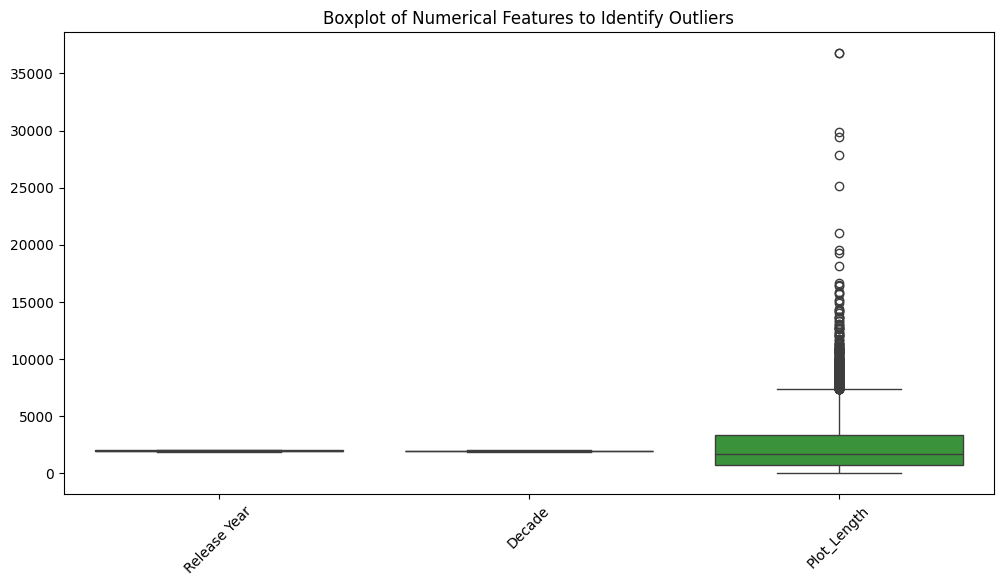

In [16]:
# Visualizing outliers using boxplot for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features to Identify Outliers')
plt.xticks(rotation=45)
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              34886 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
 8   Decade            34886 non-null  int64 
 9   Plot_Length       34886 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.7+ MB


In [19]:
# Perform One Hot Encoding for categorical columns
# First, identify categorical columns that need encoding
categorical_columns = [
    'Origin/Ethnicity', ' Genre ', 'Plot', 'Decade',
    'Plot_Length', 'Cast', 
]

# Create a copy of the dataframe before encoding
df_encoded = df.copy()

# Apply one-hot encoding using pandas get_dummies
for column in categorical_columns:
    if column in df_encoded.columns:
        # Create dummies and drop the original column
        dummies = pd.get_dummies(df_encoded[column], prefix=column, drop_first=False)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded.drop(column, axis=1, inplace=True)

# Display the shape of the dataframe before and after encoding
print(f"Original dataframe shape: {df.shape}")
print(f"Encoded dataframe shape: {df_encoded.shape}")

# Display the first few rows of the encoded dataframe
df_encoded.head()

Original dataframe shape: (34886, 10)
Encoded dataframe shape: (34886, 72473)


,Release Year,Title,Director,Genre,Wiki Page,Origin/Ethnicity_American,Origin/Ethnicity_Assamese,Origin/Ethnicity_Australian,Origin/Ethnicity_Bangladeshi,Origin/Ethnicity_Bengali,...,"Cast_Öner Erkan, Asuman Dabak & Ayşen Gruda","Cast_Öner Erkan, Kadir Çermik & Damla Sönmez","Cast_İsmail Hacıoğlu, Erkan Can & Uğur Polat","Cast_Şafak Sezer, Alp Kırşan & Ahmet Mümtaz Taylan","Cast_Şahan Gökbakar, Gülsen Özbakan & Efe Babacan","Cast_Şahan Gökbakar, Zeynep Çamcı & Emirhan Çelik","Cast_Şahin K, Nuri Alço & Coşkun Göğen","Cast_Şerif Sezer, Mark Dacascos & Zeynep Beşerler","Cast_Şevket Emrulla, Nilüfer Açıkalın & İlker İnanoğlu","Cast_Şeyma Uzunlar, Vahide Gördüm & Sevinç Baş"
0,1901,Kansas Saloon Smashers,Unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1901,Love by the Light of the Moon,Unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1901,The Martyred Presidents,Unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1901,"Terrible Teddy, the Grizzly King",Unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1902,Jack and the Beanstalk,"George S. Fleming, Edwin S. Porter",unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
